In [30]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans, AgglomerativeClustering  
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

df = pd.read_csv('CasusData.csv')
df.shape   #find dimension of data frame
df.head()  #show the 1st five rows
print(df)  #show all the data

       WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0         100     100     100     100     100     100     100     100     100   
1         100     100     100     100     100     100     100     100     100   
2         100     100     100     100     100     100     100     -97     100   
3         100     100     100     100     100     100     100     100     100   
4         100     100     100     100     100     100     100     100     100   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
19932     100     100     100     100     100     100     100     100     100   
19933     100     100     100     100     100     100     100     100     100   
19934     100     100     100     100     100     100     100     100     100   
19935     100     100     100     100     100     100     100     100     100   
19936     100     100     100     100     100     100     100     100     100   

       WAP010  ...  WAP520 

In [31]:
# Verwijder duplicaten in 'PHONEID' per 'USERID'
unique_phones = df.drop_duplicates(subset=['USERID', 'PHONEID'])

# Gebruik de groupby-functie om de unieke phoneid's per userid te groeperen
result = unique_phones.groupby('USERID')['PHONEID'].agg(lambda x: ', '.join(map(str, x))).reset_index()
print(result)

    USERID PHONEID
0        1      14
1        2      23
2        3      16
3        4      18
4        5       3
5        6      19
6        7       6
7        8       1
8        9      14
9       10       8
10      11      13
11      12      24
12      13      17
13      14       7
14      15      11
15      16      14
16      17      22
17      18      10


       USERID  LONGITUDE      LATITUDE  cluster
0           2 -7541.2643  4.864921e+06        0
1           2 -7536.6212  4.864934e+06        0
2           2 -7519.1524  4.864950e+06        0
3           2 -7524.5704  4.864934e+06        0
4          11 -7632.1436  4.864982e+06        2
...       ...        ...           ...      ...
19932      18 -7485.4686  4.864875e+06        0
19933      18 -7390.6206  4.864836e+06        1
19934      18 -7516.8415  4.864889e+06        0
19935      18 -7537.3219  4.864896e+06        0
19936      18 -7536.1658  4.864898e+06        0

[19937 rows x 4 columns]


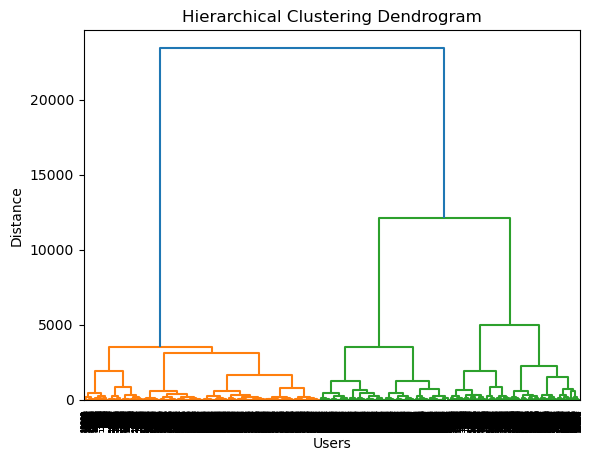

In [34]:
# Selecteer de relevante kolommen (longitude en latitude)
locations = df[['LONGITUDE', 'LATITUDE']]

# Kies het aantal clusters dat je wilt
num_clusters = 3  # deze nog aan passen
# Bereken de afstandsmaat voor de locaties (bijvoorbeeld euclidische afstand)
distances = pdist(locations)

# Voer agglomeratieve clustering uit
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
df['cluster'] = agg_clustering.fit_predict(locations)

# Toon de resulterende dataframe met clusters
print(df[['USERID', 'LONGITUDE', 'LATITUDE', 'cluster']])

# Visualiseer een dendrogram (voorbeeld)
linkage_matrix = linkage(distances, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Users')
plt.ylabel('Distance')
plt.show()